## Plot the Flux Cross-sections

In [1]:
import cmocean.cm as cm
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import LogNorm
import numpy as np
import scipy.interpolate as interp
import xarray as xr

%matplotlib inline
plt.rcParams['font.size'] = 16

In [2]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdepw_1d)
figrid = 386
igrid = figrid-1
tmask = mymesh.tmask[0]
fmask = mymesh.fmask[0, :, igrid]
f_lons = mymesh.glamf[0, igrid]
u_lons = mymesh.glamv[0, igrid]    # note switch to v with the switch from t to f
w_depths = mymesh.gdepw_1d
xs, ys = np.meshgrid(np.array(mymesh.glamv[0, igrid]), np.array(mymesh.gdept_1d))

In [3]:
m2lon = ((u_lons[314]-u_lons[260])/(mymesh.e2f[0, igrid, 260:314].sum())).values
m2lon

array(1.03749927e-05)

In [4]:
def draw_patches(fmask, ll, ul, u_lons, w_depths):
    topo = []
    for i in range(ll,ul):
        for j in range(39):
            if fmask[j, i] == 0:
                rect = Rectangle((u_lons[i], w_depths[j]), u_lons[i+1]-u_lons[i], w_depths[j+1]-w_depths[j])
                topo.append(rect)
    pc = PatchCollection(topo, facecolors='lightgray', edgecolors='lightgray')
    return(pc)

In [5]:
def get_data_forward(month, year, section=2):
    amonth = glob.glob('/data/sallen/results/Ariane/FullNorth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lons = mydata.init_lon[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lons = np.concatenate((lons, mydata.init_lon[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        mydata.close()
    return lons, depths, transports

In [6]:
def get_data_backward_gi(month, year, section = 2):
    amonth = glob.glob('/data/sallen/results/Ariane/InGIslands/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lons = mydata.init_lon[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lons = np.concatenate((lons, mydata.init_lon[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        mydata.close()
    return lons, depths, transports

In [7]:
def get_data_forward_gi(month, year, section = 2):
    amonth = glob.glob('/data/sallen/results/Ariane/SouthGIslands//*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lons = mydata.init_lon[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lons = np.concatenate((lons, mydata.init_lon[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        mydata.close()
    return lons, depths, transports

In [8]:
def get_data_backward(month, year, section=2):
    amonth = glob.glob('/data/sallen/results/Ariane/BackNorth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lons = mydata.init_lon[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lons = np.concatenate((lons, mydata.init_lon[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        mydata.close()
    return lons, depths, transports

In [9]:
month = {1:'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 
         8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
lons, depths, transports = np.array([]), np.array([]), np.array([])
months = 4*np.ones_like(lons)
years = 15*np.ones_like(lons)
for y in [15, 16, 17, 18]:
    print(y)
    for m in month:
        newlons, newdepths, newtransports = get_data_backward(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        lons = np.concatenate((lons, newlons))
        depths = np.concatenate((depths, newdepths))
        transports = np.concatenate((transports, newtransports))
        months = np.concatenate((months, newmonths))
        years = np.concatenate((years, newyears))
        
        newlons, newdepths, newtransports = get_data_backward_gi(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        lons = np.concatenate((lons, newlons))
        depths = np.concatenate((depths, newdepths))
        transports = np.concatenate((transports, newtransports))
        months = np.concatenate((months, newmonths))
        years = np.concatenate((years, newyears))

15
16
17
18


In [10]:
month = {1:'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 
         8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
olons, odepths, otransports = np.array([]), np.array([]), np.array([])
omonths = 4*np.ones_like(olons)
oyears = 15*np.ones_like(olons)
for y in [15, 16, 17, 18]:
    print(y)
    for m in month:
        newlons, newdepths, newtransports = get_data_forward(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        olons = np.concatenate((olons, newlons))
        odepths = np.concatenate((odepths, newdepths))
        otransports = np.concatenate((otransports, newtransports))
        omonths = np.concatenate((omonths, newmonths))
        oyears = np.concatenate((oyears, newyears))
        
        newlons, newdepths, newtransports = get_data_forward_gi(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        olons = np.concatenate((olons, newlons))
        odepths = np.concatenate((odepths, newdepths))
        otransports = np.concatenate((otransports, newtransports))
        omonths = np.concatenate((omonths, newmonths))
        oyears = np.concatenate((oyears, newyears))

15
16
17
18


0.8509435260061651


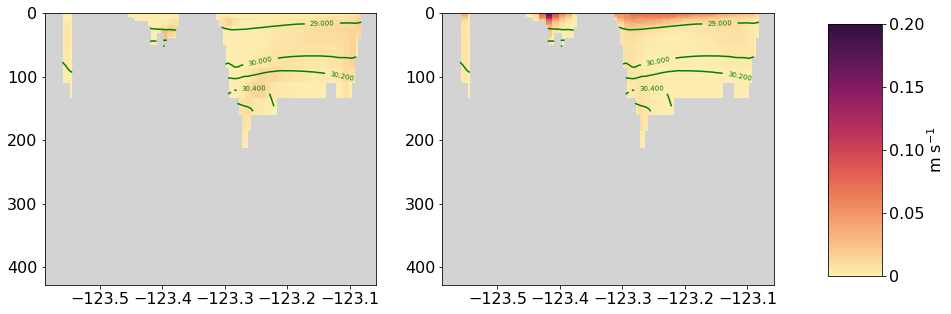

In [11]:
salfile = xr.open_dataset('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20150401_20150430.nc')
salinity = 0.5*(np.ma.array(salfile.vosaline[0, :, igrid],
                       mask=1-tmask[:, igrid]) +
                    np.ma.array(salfile.vosaline[0, :, igrid+1],
                       mask=1-tmask[:, igrid+1]))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
vmax = 0.20 / transports[(years==15) & (months==4)].sum() / m2lon * 24 * 30
v2max = 0.20 / otransports[(oyears==15) & (omonths==4)].sum() / m2lon * 24 * 30
jmin = 210
gridding = 2
c, xedge, yedge, im = axs[0].hist2d(lons[(years==15) & (months==4)], 
                                depths[(years==15) & (months==4)],
                                weights=transports[(years==15) & (months==4)],
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                    vmax=vmax, density=True)

c, xedge, yedge, im2 = axs[1].hist2d(olons[(oyears==15) & (omonths==4)], 
                                odepths[(oyears==15) & (omonths==4)],
                                weights=otransports[(oyears==15) & (omonths==4)],
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                vmax=v2max, density=True)
print (c.max()/v2max)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb1 = fig.colorbar(im2, cax=cbar_ax)
cb1.set_label('m s$^{-1}$', labelpad=2)
myticks = np.arange(5)/4
cb1.set_ticks(v2max*myticks)
mylabels = ['0']
for tick in myticks[1:]:
    mylabels.append(f'{tick * v2max * float(m2lon) * otransports[(oyears==15) & (omonths==4)].sum()/24/30:.2f}')
cb1.set_ticklabels(mylabels)


for ax in axs:
    ax.invert_yaxis()
    CS = ax.contour(xs, ys, salinity,  [29, 30, 30.2, 30.4, 30.6, 30.8, 31, 31.2, 31.4], colors='g')
    ax.clabel(CS, inline=1, fontsize=7)
pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
axs[0].add_collection(pc)
pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
axs[1].add_collection(pc);


So to keep this all under control we want: for the paper renewal "Jul-Oct", Winter "Dec-Mar" Averages over the 4 years

For the supps.  Lets try the monthlies and see what they look like.  (Worry about the salinity later)

In [12]:
fullmonths = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthend = ['31', '28', '31', '30', '31', '30', '31', '31', '30', '31', '30', '31']
leapend = ['31', '29', '31', '30', '31', '30', '31', '31', '30', '31', '30', '31']

0.008 1.3924676077178846 0.9930291769580228
0.10330294773817136 1.4619627424081004e-06
0.52466923203942 2.2199185770198174e-07
0.008 0.6962976527615248 0.5647455136748971
0.2531697816166606 3.4607836978345837e-06
0.8572207623584754 1.8567410209559458e-06
0.008 0.5874522938683344 0.5732609532259988
0.37539195468721337 3.5018959409180007e-06
0.6839259990518394 4.622290120810123e-06
0.008 1.8891721750984445 1.0991852498358639
0.0839840223938561 6.203623886006212e-06
0.4316532511517047 3.227392388639934e-06
0.005000000000000002
0.010000000000000004
0.020000000000000007
0.05000000000000001
0.10000000000000002
0.25000000000000006
0.0020000000000000005


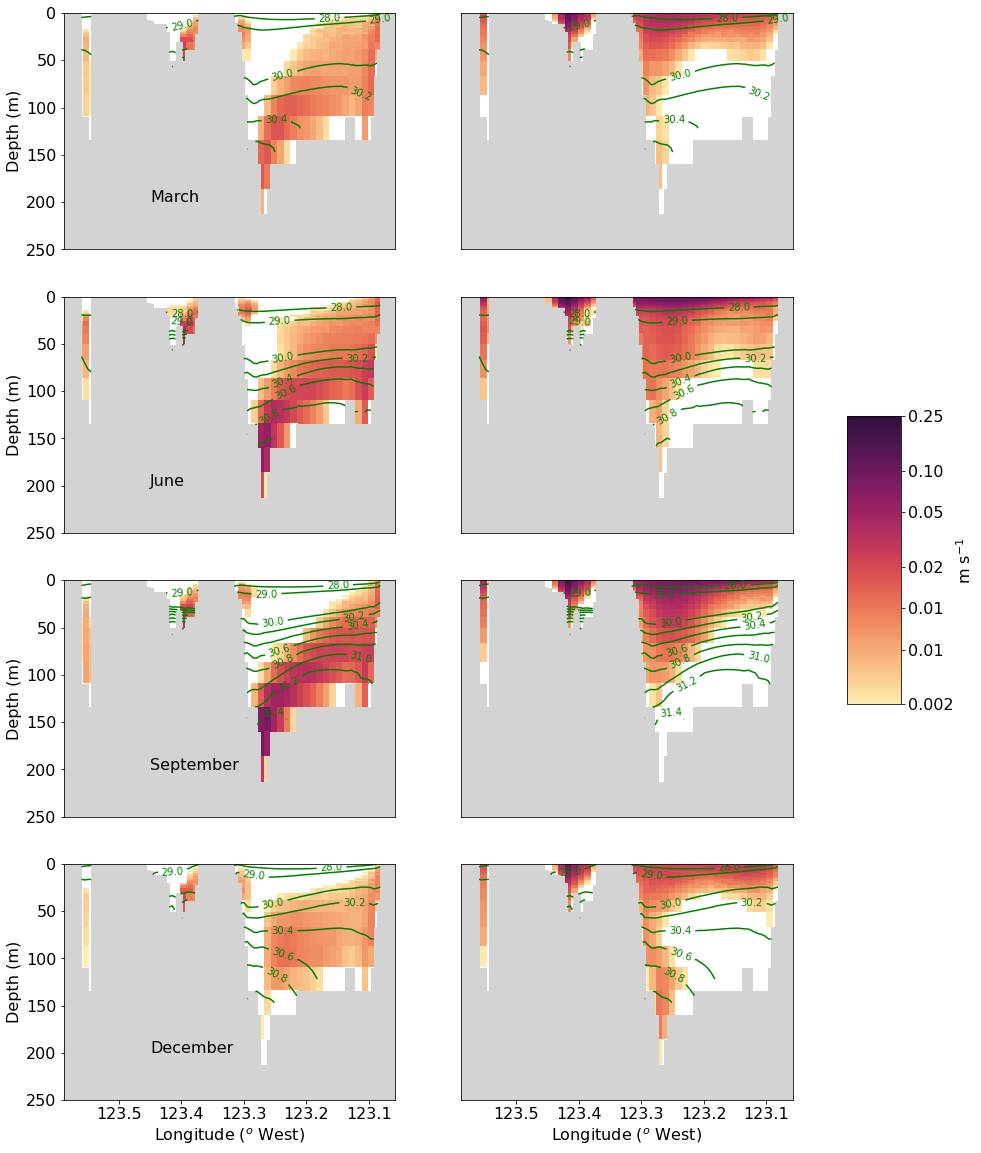

In [16]:
fig, axs = plt.subplots(4, 2, figsize=(15, 5*4))

cmap = cm.matter
cmap.set_under('white')

for ix in range(4):
    month = 3 + ix*3
    imonth = month - 1
    vmax = 0.25 / (transports[(months==month)].sum() * 0.25) / m2lon * 24 * 30
    v2max = 0.25 / (otransports[(omonths==month)].sum() * 0.25) / m2lon * 24 * 30
    vmin = 0.008
    print (vmin, vmax, v2max)

    jmin = 210
    gridding = 2
    c, xedge, yedge, im = axs[ix, 0].hist2d(lons[(months==month)], 
                                depths[(months==month)],
                                weights=transports[(months==month)],
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                    density=True, norm=LogNorm(vmax=vmax, vmin=vmin*vmax))
    print(c.max()/vmax, c[np.nonzero(c)].min()/vmax) # theta[np.nonzero(theta)]
    c, xedge, yedge, im2 = axs[ix, 1].hist2d(olons[(omonths==month)], 
                                odepths[(omonths==month)],
                                weights=otransports[(omonths==month)],
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                density=True, norm=LogNorm(vmax=v2max, vmin=vmin*v2max))
    print (c.max()/v2max, c[np.nonzero(c)].min()/v2max)
    
    for ax in axs[ix]:
        ax.invert_yaxis()
        ax.set_ylim(250, 0)
    axs[ix, 0].text(-123.45, 200, fullmonths[imonth])
    
    salinity = np.zeros_like(np.array(tmask[:, igrid]))
    salfiles = [xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_2015{month:02d}01_2015{month:02d}{monthend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_2016{month:02d}01_2016{month:02d}{leapend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_2017{month:02d}01_2017{month:02d}{monthend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_2018{month:02d}01_2018{month:02d}{monthend[imonth]}.nc')]
    for isal in range(4):
        salinity = salinity + 0.5*(np.ma.array(salfiles[isal].vosaline[0, :, igrid],
                       mask=1-tmask[:, igrid]) +
                        np.ma.array(salfiles[isal].vosaline[0, :, igrid+1],
                           mask=1-tmask[:, igrid+1]))
        salfiles[isal].close()
    salinity = 0.25*salinity
    for ax in axs[ix]:
        CS = ax.contour(xs, ys, salinity,  [28, 29, 30, 30.2, 30.4, 30.6, 30.8, 31, 31.2, 31.4], colors='g')
        ax.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
    pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
    axs[ix, 0].add_collection(pc)
    pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
    axs[ix, 1].add_collection(pc)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.4, 0.05, 0.2])
cb1 = fig.colorbar(im2, cax=cbar_ax)
cb1.set_label('m s$^{-1}$', labelpad=2)
myticks = np.array([0.008, 0.02, 0.04, 0.08, 0.2, 0.4, 1.0])
cb1.set_ticks(v2max*myticks)
mylabels = ['hold']
for tick in myticks[1:]:
    thelabel = tick * v2max * float(m2lon) * otransports[(omonths==month)].sum() * 0.25/24/30
    print (thelabel)
    mylabels.append(f'{thelabel:.2f}')
mylabels[0] = f'{thelabel*vmin:.3f}'
print (thelabel*vmin)
cb1.minorticks_off()
cb1.set_ticklabels(mylabels)

for ax in axs[:, 1]:
    ax.set_yticks([])
for ax in axs[:, 0]:
    ax.set_ylabel('Depth (m)')
for ix in range(2):
    for ax in axs[:-1, ix]:
        ax.set_xticks([])
    mylabels = []
    myticks = axs[-1, ix].get_xticks().tolist()
    for tick in myticks:
        mylabels.append(f'{-tick}')
    axs[-1, ix].set_xticks(myticks[1:-1])
    axs[-1, ix].set_xticklabels(mylabels[1:-1])
    axs[-1, ix].set_xlabel("Longitude ($^o$ West)")

fig.savefig('PointRobertsFlux.png')
fig.savefig('PointRobertsFlux.pdf')

0.008 2.085842651943795 1.1521061875656449
0.09562018543104525
0.5985554358043612
0.008 1.9476888982265357 1.0434418805374444
0.09534780174447184
0.5692132029224278
0.008 1.4597214511473513 1.0334171224301218
0.13434964380781628
0.6722289637595013
0.008 1.420698127139379 0.7792683595590465
0.11956084632227494
0.6807548208049321
0.008 0.6602144222660576 0.5567794999973512
0.3503876440775331
0.8443144271539051
0.008 0.6526816373175715 0.5295444333508114
0.27982161244022125
0.880637202412508
0.008 0.5344663639043232 0.5096304558108702
0.3738778536472536
0.8866131263793415
0.008 0.5655420810071896 0.555723979490539
0.36608970543630204
0.791414766480956
0.008 0.6930584546128065 0.6017328552847426
0.23569435447052586
0.6311482942546686
0.008 0.8338020330439808 0.7926293503734773
0.1862345523515005
0.5983205595585809
0.008 1.4525392286209673 1.0344005049725886
0.10861001902006238
0.5232017916104297
0.008 1.8306351504725877 1.3101047580397334
0.069221231701388
0.3049060080469409
0.005
0.01
0.0

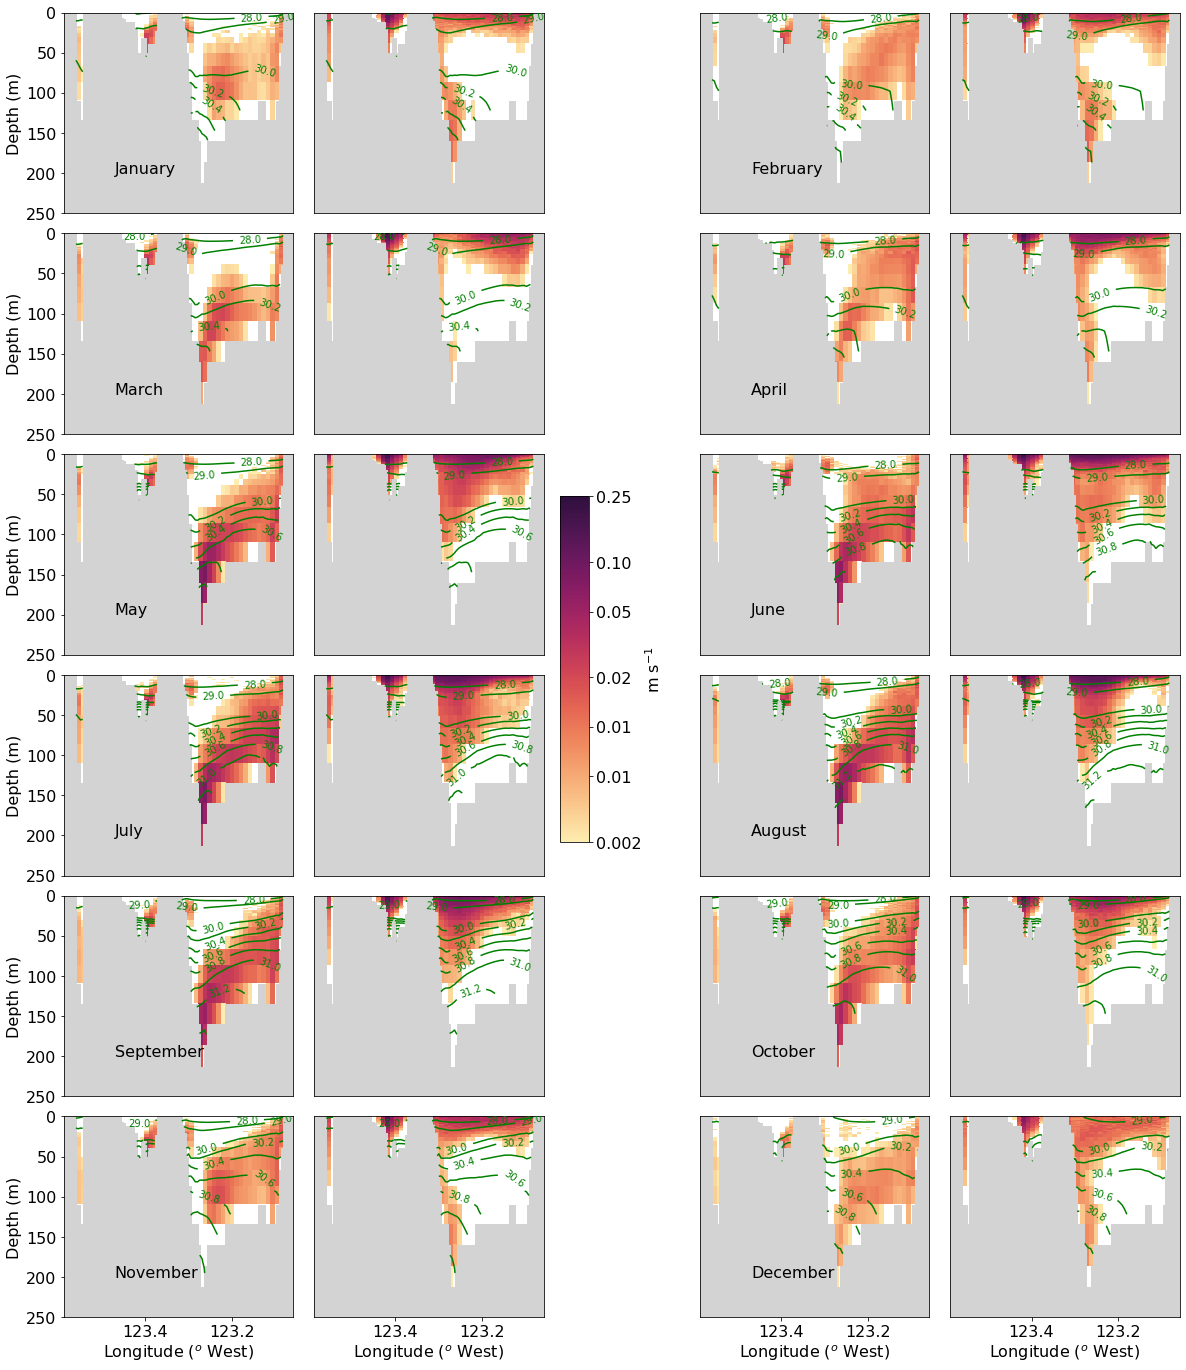

In [17]:
#fig, axs = plt.subplots(12, 2, figsize=(15, 5*12))
fig = plt.figure()
 
fig.set_figheight(4*6)
fig.set_figwidth(20)

spec = gridspec.GridSpec(ncols=5, nrows=6,
                         width_ratios=[2, 2, 1, 2, 2], wspace=0.1,
                         hspace=0.1, height_ratios=[1, 1, 1, 1, 1, 1])

year = 2015
iy = 15

cmap = cm.matter
cmap.set_under('white')

ix = 0
axs = [None]*5*6

for imonth in range(12):
    month = imonth + 1
    
    axs[ix] = fig.add_subplot(spec[ix])
    
    vmax = 0.25 / transports[(years==15) & (months==month)].sum() / m2lon * 24 * 30
    v2max = 0.25 / otransports[(oyears==15) & (omonths==month)].sum() / m2lon * 24 * 30
    vmin = 0.008
    print (vmin, vmax, v2max)

    jmin = 210
    gridding = 2
    c, xedge, yedge, im = axs[ix].hist2d(lons[(years==iy) & (months==month)], 
                                depths[(years==15) & (months==month)],
                                weights=transports[(years==iy) & (months==month)],
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                density=True, norm=LogNorm(vmax=vmax, vmin=vmin*vmax))
    print(c.max()/vmax)
    ix = ix + 1
    axs[ix] = fig.add_subplot(spec[ix])
    c, xedge, yedge, im2 = axs[ix].hist2d(olons[(oyears==iy) & (omonths==month)], 
                                odepths[(oyears==15) & (omonths==month)],
                                weights=otransports[(oyears==iy) & (omonths==month)],
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                density=True, norm=LogNorm(vmax=v2max, vmin=vmin*v2max))
    print (c.max()/v2max)
    
    for ax in axs[ix-1:ix+1]:
        ax.invert_yaxis()
        ax.set_ylim(250, 0)
    axs[ix-1].text(-123.47, 200, fullmonths[imonth])
    salfile = xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_{year}{month:02d}01_{year}{month:02d}{monthend[imonth]}.nc')           
    salinity = 0.5*(np.ma.array(salfile.vosaline[0, :, igrid],
                       mask=1-tmask[:, igrid]) +
                        np.ma.array(salfile.vosaline[0, :, igrid+1],
                           mask=1-tmask[:, igrid+1]))
    salfile.close()
    for ax in axs[ix-1:ix+1]:
        CS = ax.contour(xs, ys, salinity,  [28, 29, 30, 30.2, 30.4, 30.6, 30.8, 31, 31.2, 31.4], colors='g')
        ax.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
    pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
    axs[ix-1].add_collection(pc)
    pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
    axs[ix].add_collection(pc)
    
    if ix in [1, 6, 11, 16, 21, 26]:
        axs[ix].set_yticks([])
        axs[ix-1].set_ylabel('Depth (m)')
    else:
        axs[ix].set_yticks([])
        axs[ix-1].set_yticks([])
    
    if ix not in [26, 29]:
        axs[ix].set_xticks([])
        axs[ix-1].set_xticks([])
    
    ix = ix + 1
    if ix in [2, 7, 12, 17, 22, 27]:
        ix = ix + 1
        
cbar_ax = fig.add_axes([0.47, 0.4, 0.02, 0.2])
cb1 = fig.colorbar(im2, cax=cbar_ax)
cb1.set_label('m s$^{-1}$', labelpad=2)
myticks = np.array([0.008, 0.02, 0.04, 0.08, 0.2, 0.4, 1.0])
cb1.set_ticks(v2max*myticks)
mylabels = ['hold']
for tick in myticks[1:]:
    thelabel = tick * v2max * float(m2lon) * otransports[(oyears==15) & (omonths==month)].sum()/24/30
    print (thelabel)
    mylabels.append(f'{thelabel:.2f}')
mylabels[0] = f'{thelabel*vmin:.3f}'
cb1.minorticks_off()
cb1.set_ticklabels(mylabels)

for ix in [25, 26, 28, 29]:
    mylabels = []
    myticks2 = axs[ix].get_xticks().tolist()
    print (myticks2)
    for tick in myticks2:
        mylabels.append(f'{-tick}')
    axs[ix].set_xticks(myticks2[1:-1])
    axs[ix].set_xticklabels(mylabels[1:-1])
    axs[ix].set_xlabel("Longitude ($^o$ West)")


fig.savefig('PointRobertsFlux2015_allmonths.png')
fig.savefig('PointRobertsFlux2015_allmonths.pdf')

In [18]:
for isal in range(4):
    salfiles[isal].close()

0.008 1.3924676077178846 0.9930291769580228
0.10330294773817136 1.4619627424081004e-06
0.52466923203942 2.2199185770198174e-07
19.454662
0.008 0.6962976527615248 0.5647455136748971
0.2531697816166606 3.4607836978345837e-06
0.8572207623584754 1.8567410209559458e-06
3.302363
0.008 0.5874522938683344 0.5732609532259988
0.37539195468721337 3.5018959409180007e-06
0.6839259990518394 4.622290120810123e-06
12.845925
0.008 1.8891721750984445 1.0991852498358639
0.0839840223938561 6.203623886006212e-06
0.4316532511517047 3.227392388639934e-06
23.57806
0.005000000000000002
0.010000000000000004
0.020000000000000007
0.05000000000000001
0.10000000000000002
0.25000000000000006
0.0020000000000000005


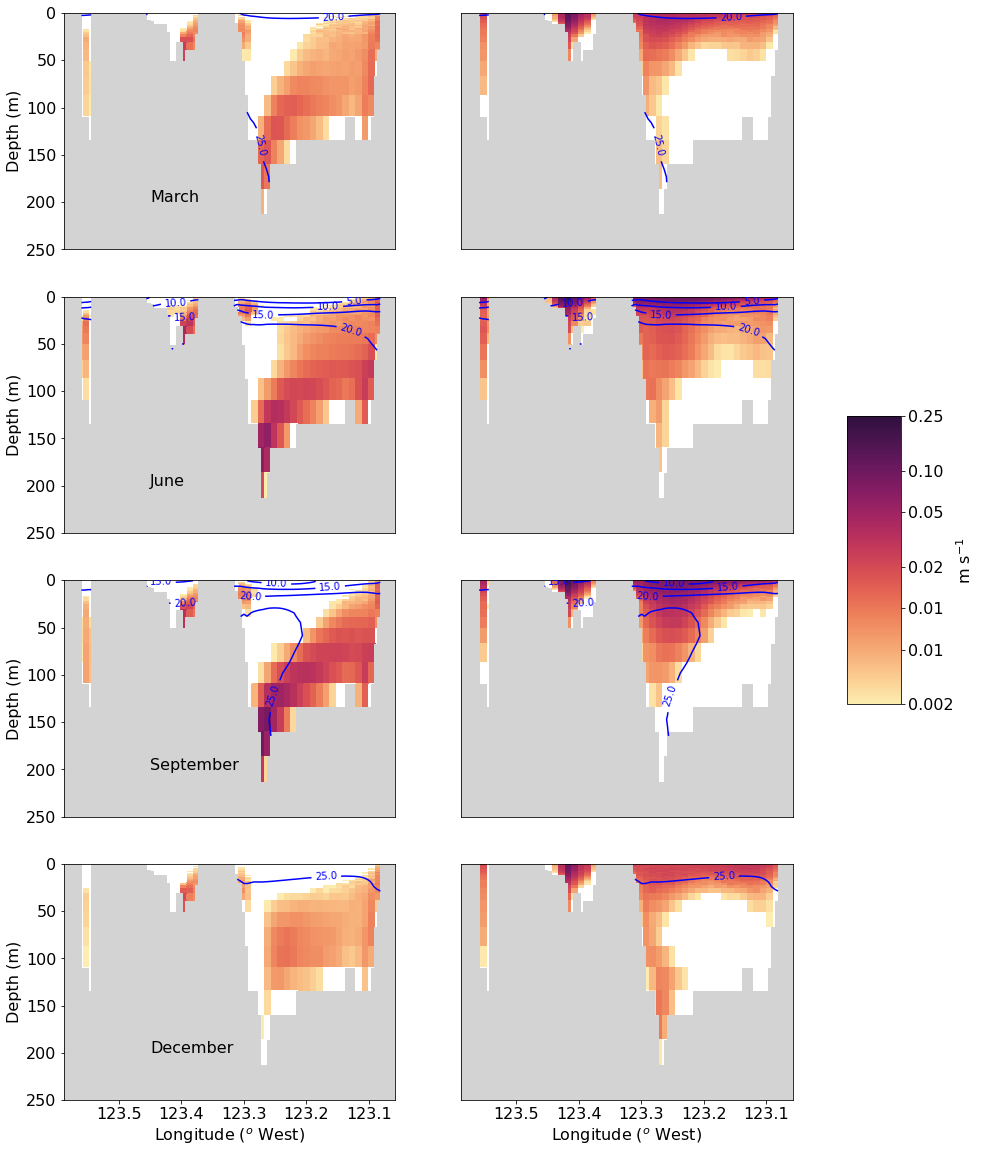

In [19]:
fig, axs = plt.subplots(4, 2, figsize=(15, 5*4))

cmap = cm.matter
cmap.set_under('white')

for ix in range(4):
    month = 3 + ix*3
    imonth = month - 1
    vmax = 0.25 / (transports[(months==month)].sum() * 0.25) / m2lon * 24 * 30
    v2max = 0.25 / (otransports[(omonths==month)].sum() * 0.25) / m2lon * 24 * 30
    vmin = 0.008
    print (vmin, vmax, v2max)

    jmin = 210
    gridding = 2
    c, xedge, yedge, im = axs[ix, 0].hist2d(lons[(months==month)], 
                                depths[(months==month)],
                                weights=transports[(months==month)],
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                    density=True, norm=LogNorm(vmax=vmax, vmin=vmin*vmax))
    print(c.max()/vmax, c[np.nonzero(c)].min()/vmax) # theta[np.nonzero(theta)]
    c, xedge, yedge, im2 = axs[ix, 1].hist2d(olons[(omonths==month)], 
                                odepths[(omonths==month)],
                                weights=otransports[(omonths==month)],
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                density=True, norm=LogNorm(vmax=v2max, vmin=vmin*v2max))
    print (c.max()/v2max, c[np.nonzero(c)].min()/v2max)
    
    for ax in axs[ix]:
        ax.invert_yaxis()
        ax.set_ylim(250, 0)
    axs[ix, 0].text(-123.45, 200, fullmonths[imonth])
    
    salinity = np.zeros_like(np.array(tmask[:, igrid]))
    salfiles = [xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_ptrc_T_2015{month:02d}01_2015{month:02d}{monthend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_ptrc_T_2016{month:02d}01_2016{month:02d}{leapend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_ptrc_T_2017{month:02d}01_2017{month:02d}{monthend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_ptrc_T_2018{month:02d}01_2018{month:02d}{monthend[imonth]}.nc')]
    for isal in range(4):
        salinity = salinity + 0.5*(np.ma.array(salfiles[isal].nitrate[0, :, igrid],
                       mask=1-tmask[:, igrid]) +
                        np.ma.array(salfiles[isal].nitrate[0, :, igrid+1],
                           mask=1-tmask[:, igrid+1]))
        salfiles[isal].close()
    salinity = 0.25*salinity
    print (salinity[0, 304])
    for ax in axs[ix]:
        CS = ax.contour(xs, ys, salinity, np.arange(0, 30, 5), colors='b')
        ax.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
    pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
    axs[ix, 0].add_collection(pc)
    pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
    axs[ix, 1].add_collection(pc)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.4, 0.05, 0.2])
cb1 = fig.colorbar(im2, cax=cbar_ax)
cb1.set_label('m s$^{-1}$', labelpad=2)
myticks = np.array([0.008, 0.02, 0.04, 0.08, 0.2, 0.4, 1.0])
cb1.set_ticks(v2max*myticks)
mylabels = ['hold']
for tick in myticks[1:]:
    thelabel = tick * v2max * float(m2lon) * otransports[(omonths==month)].sum() * 0.25/24/30
    print (thelabel)
    mylabels.append(f'{thelabel:.2f}')
mylabels[0] = f'{thelabel*vmin:.3f}'
print (thelabel*vmin)
cb1.minorticks_off()
cb1.set_ticklabels(mylabels)

for ax in axs[:, 1]:
    ax.set_yticks([])
for ax in axs[:, 0]:
    ax.set_ylabel('Depth (m)')
for ix in range(2):
    for ax in axs[:-1, ix]:
        ax.set_xticks([])
    mylabels = []
    myticks = axs[-1, ix].get_xticks().tolist()
    for tick in myticks:
        mylabels.append(f'{-tick}')
    axs[-1, ix].set_xticks(myticks[1:-1])
    axs[-1, ix].set_xticklabels(mylabels[1:-1])
    axs[-1, ix].set_xlabel("Longitude ($^o$ West)")

fig.savefig('PointRobertsNitrate.png')
fig.savefig('PointRobertsNitrate.pdf')

0.008 1.3924676077178846 0.9930291769580228
0.10330294773817136 1.4619627424081004e-06
0.52466923203942 2.2199185770198174e-07
1884.9536
0.008 0.6962976527615248 0.5647455136748971
0.2531697816166606 3.4607836978345837e-06
0.8572207623584754 1.8567410209559458e-06
1475.5479
0.008 0.5874522938683344 0.5732609532259988
0.37539195468721337 3.5018959409180007e-06
0.6839259990518394 4.622290120810123e-06
1800.8925
0.008 1.8891721750984445 1.0991852498358639
0.0839840223938561 6.203623886006212e-06
0.4316532511517047 3.227392388639934e-06
1943.929
0.005000000000000002
0.010000000000000004
0.020000000000000007
0.05000000000000001
0.10000000000000002
0.25000000000000006
0.0020000000000000005


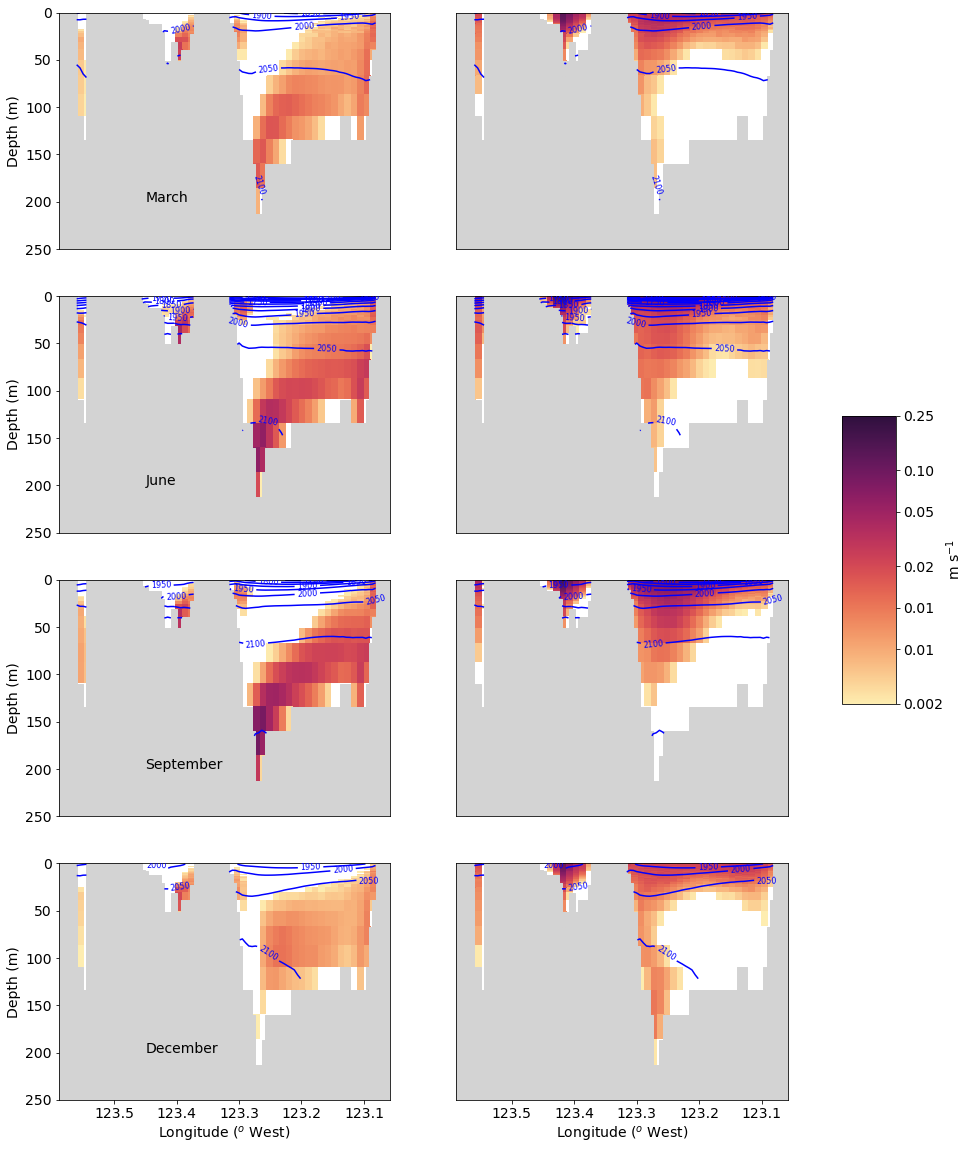

In [28]:
fig, axs = plt.subplots(4, 2, figsize=(15, 5*4))

cmap = cm.matter
cmap.set_under('white')

for ix in range(4):
    month = 3 + ix*3
    imonth = month - 1
    vmax = 0.25 / (transports[(months==month)].sum() * 0.25) / m2lon * 24 * 30
    v2max = 0.25 / (otransports[(omonths==month)].sum() * 0.25) / m2lon * 24 * 30
    vmin = 0.008
    print (vmin, vmax, v2max)

    jmin = 210
    gridding = 2
    c, xedge, yedge, im = axs[ix, 0].hist2d(lons[(months==month)], 
                                depths[(months==month)],
                                weights=transports[(months==month)],
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                    density=True, norm=LogNorm(vmax=vmax, vmin=vmin*vmax))
    print(c.max()/vmax, c[np.nonzero(c)].min()/vmax) # theta[np.nonzero(theta)]
    c, xedge, yedge, im2 = axs[ix, 1].hist2d(olons[(omonths==month)], 
                                odepths[(omonths==month)],
                                weights=otransports[(omonths==month)],
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                density=True, norm=LogNorm(vmax=v2max, vmin=vmin*v2max))
    print (c.max()/v2max, c[np.nonzero(c)].min()/v2max)
    
    for ax in axs[ix]:
        ax.invert_yaxis()
        ax.set_ylim(250, 0)
    axs[ix, 0].text(-123.45, 200, fullmonths[imonth])
    
    salinity = np.zeros_like(np.array(tmask[:, igrid]))
    salfiles = [xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_carp_T_2015{month:02d}01_2015{month:02d}{monthend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_carp_T_2016{month:02d}01_2016{month:02d}{leapend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_carp_T_2017{month:02d}01_2017{month:02d}{monthend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_carp_T_2018{month:02d}01_2018{month:02d}{monthend[imonth]}.nc')]
    for isal in range(4):
        salinity = salinity + 0.5*(np.ma.array(salfiles[isal].dissolved_inorganic_carbon[0, :, igrid],
                       mask=1-tmask[:, igrid]) +
                        np.ma.array(salfiles[isal].dissolved_inorganic_carbon[0, :, igrid+1],
                           mask=1-tmask[:, igrid+1]))
        salfiles[isal].close()
    salinity = 0.25*salinity
    print (salinity[0, 304])
    for ax in axs[ix]:
        CS = ax.contour(xs, ys, salinity, np.arange(1500, 2200, 50), colors='b')
        ax.clabel(CS, inline=1, fontsize=8, fmt='%1.0f')
    pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
    axs[ix, 0].add_collection(pc)
    pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
    axs[ix, 1].add_collection(pc)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.4, 0.05, 0.2])
cb1 = fig.colorbar(im2, cax=cbar_ax)
cb1.set_label('m s$^{-1}$', labelpad=2)
myticks = np.array([0.008, 0.02, 0.04, 0.08, 0.2, 0.4, 1.0])
cb1.set_ticks(v2max*myticks)
mylabels = ['hold']
for tick in myticks[1:]:
    thelabel = tick * v2max * float(m2lon) * otransports[(omonths==month)].sum() * 0.25/24/30
    print (thelabel)
    mylabels.append(f'{thelabel:.2f}')
mylabels[0] = f'{thelabel*vmin:.3f}'
print (thelabel*vmin)
cb1.minorticks_off()
cb1.set_ticklabels(mylabels)

for ax in axs[:, 1]:
    ax.set_yticks([])
for ax in axs[:, 0]:
    ax.set_ylabel('Depth (m)')
for ix in range(2):
    for ax in axs[:-1, ix]:
        ax.set_xticks([])
    mylabels = []
    myticks = axs[-1, ix].get_xticks().tolist()
    for tick in myticks:
        mylabels.append(f'{-tick}')
    axs[-1, ix].set_xticks(myticks[1:-1])
    axs[-1, ix].set_xticklabels(mylabels[1:-1])
    axs[-1, ix].set_xlabel("Longitude ($^o$ West)")

#fig.savefig('PointRobertsFlux.png')
#fig.savefig('PointRobertsFlux.pdf')